Here I want to show that the pearson distance suffers from bias towards users with less items in common; the final result so far is exa. Two users with fewer items in common are more likely to have a higher correlation. 
We construct a random rating matrix, with ratings between 0 to 5, where 0 dentes no rating. 

In [1]:
import numpy as np

In [2]:
item_cnt=50
usr_cnt=200
R=np.random.randint(0,6,size=(usr_cnt,item_cnt))

In [3]:
R1=np.random.choice(4, size=(usr_cnt/2,item_cnt), p=[0.7, .1, 0.1, 0.1])
R2=np.random.choice(4, size=(usr_cnt/2,item_cnt), p=[0.4, .2, 0.2, 0.2])
R=np.concatenate((R1, R2), axis=0)
print(R.shape)

(200, 50)


/Users/pejman/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Users/pejman/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [4]:
R

array([[0, 0, 3, ..., 0, 1, 0],
       [1, 0, 1, ..., 3, 0, 0],
       [2, 2, 2, ..., 0, 0, 3],
       ..., 
       [0, 3, 0, ..., 1, 0, 2],
       [3, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 3]])

In [5]:
def incommon_cnt(i,j):
    return(len(np.nonzero(R[i,:]*R[j,:])[0]))

In [6]:
#Next for every i and j between 1 to usr_cnt
#i_j=np.transpose([np.tile(range(usr_cnt), usr_cnt), np.repeat(range(usr_cnt), usr_cnt)])

In [7]:
#L[i,j] indicates how many items user i and user j have in common and
i_j=list(zip(np.repeat(range(usr_cnt), usr_cnt),np.tile(range(usr_cnt), usr_cnt)))
L=np.zeros((usr_cnt,usr_cnt),dtype=np.int)
for x in i_j:
    L[x[0],x[1]]=incommon_cnt(x[0],x[1])

In [8]:
L

array([[19,  4,  4, ...,  9, 12,  7],
       [ 4, 16,  4, ...,  8, 10, 10],
       [ 4,  4,  9, ...,  5,  6,  4],
       ..., 
       [ 9,  8,  5, ..., 31, 18, 15],
       [12, 10,  6, ..., 18, 32, 14],
       [ 7, 10,  4, ..., 15, 14, 22]])

In [9]:
def corfnc(i,j,rnd=2):
    return round(np.corrcoef(R[i,:],R[j,:])[1,0],rnd) if np.linalg.norm(R[i,:])* np.linalg.norm(R[j,:])>0 else 2

In [10]:
#cor[i,j] indicates the correlation between their ratings
cor=np.zeros((usr_cnt,usr_cnt))
for x in i_j:
    cor[x[0],x[1]]=corfnc(x[0],x[1])

In [11]:
cor

array([[ 1.  , -0.06,  0.08, ..., -0.24, -0.17,  0.01],
       [-0.06,  1.  , -0.01, ..., -0.05, -0.07,  0.08],
       [ 0.08, -0.01,  1.  , ..., -0.03,  0.14,  0.06],
       ..., 
       [-0.24, -0.05, -0.03, ...,  1.  , -0.29, -0.09],
       [-0.17, -0.07,  0.14, ..., -0.29,  1.  ,  0.06],
       [ 0.01,  0.08,  0.06, ..., -0.09,  0.06,  1.  ]])

In [12]:
delcoor=np.where(np.array([cor[i,i] for i in range(cor.shape[0])])==2)[0]

In [13]:
for x in -np.sort(-delcoor):
    cor=np.delete(np.delete(cor,x,1),x,0)

In [14]:
from collections import defaultdict as ddict
d = ddict(list)
for i in range(L.shape[0]):
    for j in np.arange(i+1,L.shape[1]):
        d[L[i,j]].append((i,j))

In [17]:
a= ddict(list)
for k in d.keys():
    a[k]=[round(cor[x[0],x[1]],2) for x in d[k]]

In [18]:
d.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 32])

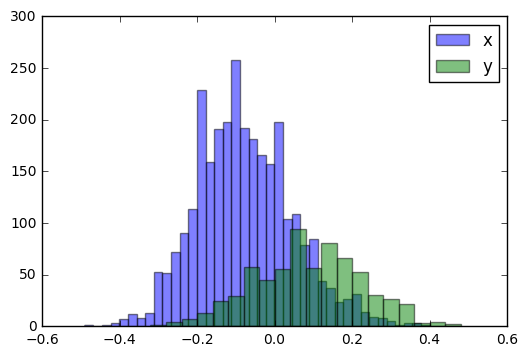

In [27]:
import matplotlib.pyplot as plt
#plt.hist(a[24]+a[25]+a[26]+a[29]+a[32], bins='auto')
plt.hist(a[0]+a[1]+a[2]+a[3]+a[4],bins='auto', alpha=0.5, label='x')
plt.hist(a[22]+a[23]+a[24]+a[25]+a[26]+a[27]+a[28]+a[29]+a[32],bins='auto',alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()
